<a href="https://colab.research.google.com/github/fjme95/algebra-lineal-para-machine-learning/blob/main/2_PCA_UK_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de componentes Principales

Se mostrará un ejemplo del uso de PCA como herramienta para reducir la dimensión.

## Dependencias del Notebook

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

## Lectura y descripción de los datos


Los datos con los que trabajaremos fueron recabados por el Departamento de Medio Ambiente, Alimentación y Asuntos Rurales (DEFRA, por sus siglas en inglés) del Reino Unido. Muestran el promedio del consumo en gramos, por semana y por persona, de 17 tipos de alimentos en los cuatro paises del Reino Unido en 1997.

Nuestro objetivo es averiguar si hay diferencias entre el consumo de alimentos de cada país.

In [ ]:
data_raw = pd.read_csv('UK_foods.csv', index_col=0)
data_raw

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


Observamos que los datos están transpuesto pues queremos que los "sujetos" en nuestro análisis sea cada pais. Para esto la tenemos que transponer

In [ ]:
data = data_raw.transpose()
data

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


Ahora que tenemos la matriz de diseño, encontrar diferencias entre los vectores de cada país puede resultar cansado trabajando con los números o inclusive con gráficas por la cantidad de variables que tenemos aún en esta matriz tan pequeña. 

Para poder hacer más fácil la detección de diferencias, reducir la dimensión de una manera inteligente es imperativo. PCA es de las técnicas más usadas para esto.

Encontraremos los componentes principales ocupando [```sklearn.decomposition.PCA```](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) y graficaremos los resultados.

In [ ]:
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))
# pca_pipeline = make_pipeline(PCA(n_components=2))
pca_data = pca_pipeline.fit_transform(data)

¿Cuánta variabilidad se explica con los primeros dos componentes?

In [ ]:
sum(pca_pipeline['pca'].explained_variance_ratio_)

0.9319915970724626

Para estos datos, se explicó el 96.5% de la variabilidad con los primeros dos componentes. Sin embargo, no siempre puede llegar a pasar esto. Para determinar el número de componentes que son útiles para los análisis correspondientes, revisar una [scree plot](https://en.wikipedia.org/wiki/Scree_plot) o tener claro cuánta variabilidad explicada queremos, puede ayudar a seleccionar el número de componentes.

La gráfica a continuación muestra el resultado de la reducción de dimensión al proyectar los vectores a los dos componentes principales. Esta muestra los **scores** de cada punto y se llama **Score Plot**. Se obtiene de una combinación lineal entre las variables originales y unos pesos llamados **loadings** que indican la "*contribución*" de cada variable a cada componente.

Text(0, 0.5, 'component 2')

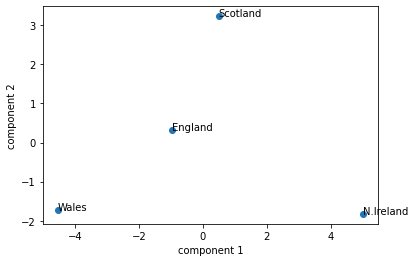

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1])
for i, txt in enumerate(list(data.index)):
    plt.annotate(txt, (pca_data[i, 0], pca_data[i, 1]))
plt.xlabel('component 1')
plt.ylabel('component 2')

Con la reducción de la dimensión, podemos observar que los hábitos alimenticios de Irlanda del Norte difieren de los demás paises del Reino Unido (en 1997). 

Además de la Score Plot, también existe la llamada **Loadings Plot** que indica la dirección en la que cada variable "empuja" a los scores en cierta dirección. Si se combinan ambas gráficas, se obtiene una **Biplot**.

In [ ]:
# https://stackoverflow.com/a/57345804
def biplot(score, coeff, labels=None, point_names = None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys) #without scaling
    if point_names is not None:
        for i, txt in enumerate(point_names):
            plt.annotate(txt, (xs[i], ys[i]))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

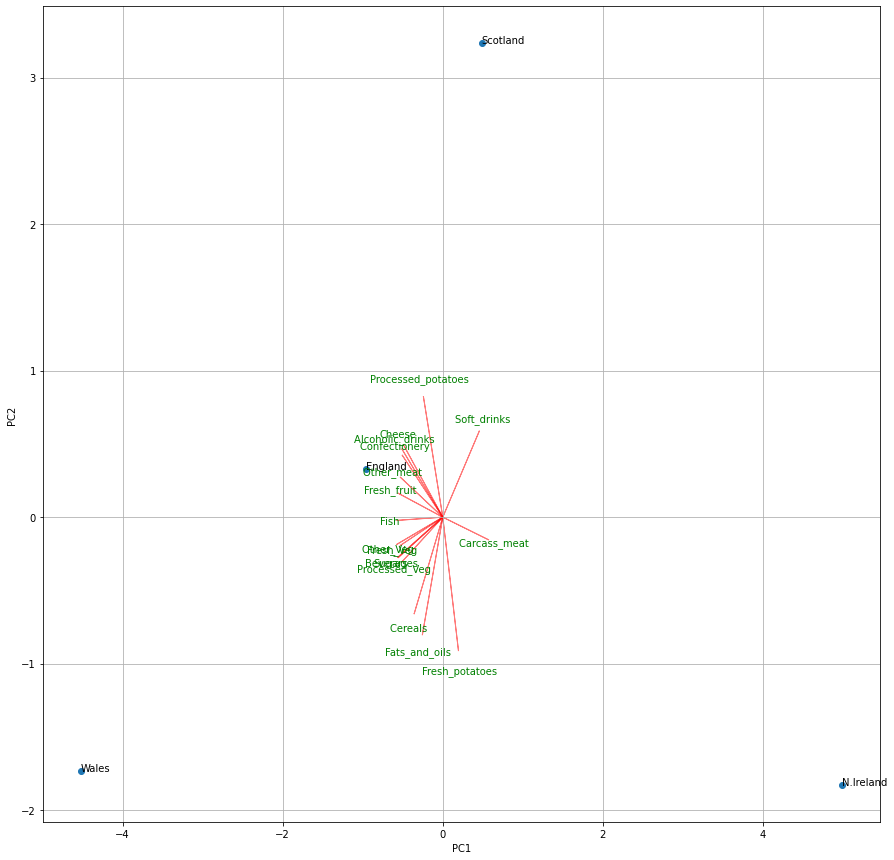

In [ ]:
plt.figure(figsize=[15, 15])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()

biplot(pca_data[:,0:2], 2 *  pca_pipeline['pca'].components_.T, list(data.columns), list(data.index))
plt.show()


In [ ]:
pca_pipeline['pca'].components_

array([[-0.24572131,  0.28562914, -0.26481055, -0.28611787, -0.12719487,
        -0.2811012 ,  0.09775901, -0.26544997, -0.28708628, -0.12073819,
        -0.25767815, -0.27890521, -0.17843996, -0.27747513,  0.22771961,
        -0.25509484, -0.25275834],
       [ 0.24708041, -0.07716993,  0.13610704, -0.01100602, -0.40054501,
        -0.13684092, -0.45468785, -0.0964863 , -0.09282322,  0.41036129,
        -0.1539603 ,  0.08174644, -0.32902948, -0.13773847,  0.29323981,
         0.23231808,  0.21105701]])